# PARTE 2: Algoritmo Árvores de Decisão

Nesta segunda parte do Trabalho você irá aplicar os algoritmos de Árvore de Decisão e de Floresta Aleatória na base de dados de risco de crédito discutida em aula. Para isso você deve primeiramente importar as bibliotecas necessárias.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 1 - Importação dos dados Pré-Processados

a) importe o arquivo salvo como 'risco_credito.pkl'



In [20]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

# 2 - Algoritmo de Árvore de Decisão



a) importar da biblioteca sklearn o pacote DecisionTreeClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

b) Calcule a árvore de decisão, utilizando como critério a entropia.
Coloque como nome da variável: arvore_risco_credito

In [22]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.criterion = 'entropy'
arvore_risco_credito = decision_tree_classifier.fit(X_risco_credito, y_risco_credito)

c) Utilize o feature_importances_ para retornar a importância de cada atributo. Qual possui o maior ganho de informação?

Renda

In [23]:
arvore_risco_credito.feature_importances_

array([0.41607015, 0.10294068, 0.03885431, 0.44213486])

d) Gere uma visualização da sua árvore de decisão utilizando o pacote tree da biblioteca do sklearn.

OBS: Adicione cores, nomes para os atributos e para as classes.

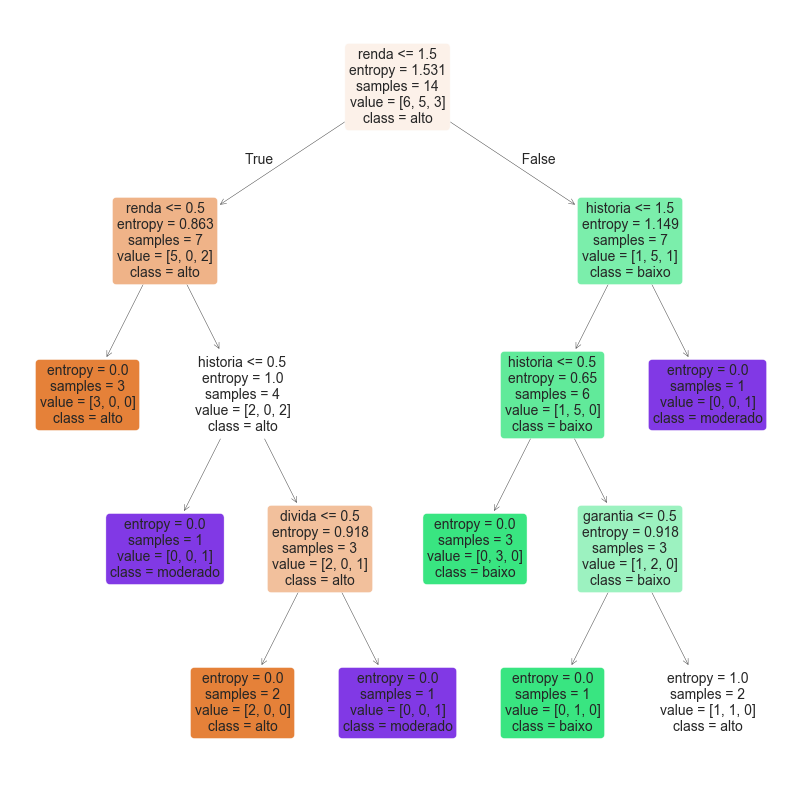

In [24]:
from sklearn import tree

arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

nomes_atributos = ['historia', 'divida', 'garantia', 'renda']
nomes_classes = ['alto', 'baixo', 'moderado']

plt.figure(figsize=(10, 10))
tree.plot_tree(
    arvore_risco_credito,
    feature_names=nomes_atributos,
    class_names=nomes_classes,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

e) FAZER A PREVISÃO

Utilize .predict para fazer a previsão realizada no exemplo em sala.

   i. história boa, dívida alta, garantia nenhuma, renda > 35

   ii. história ruim, dívida alta, garantia adequada, renda < 15


Verifique nos slides se seu resultado está correto!

In [25]:
i = [[0, 0, 1, 2]]
previsao = arvore_risco_credito.predict(i)
print('I', nomes_classes[previsao[0]])

ii = [[2, 0, 0, 0]]
previsao = arvore_risco_credito.predict(ii)
print('II', nomes_classes[previsao[0]])

I baixo
II alto


# 3 - Algoritmo de Árvore de Decisão para uma base de dados maior (Credit Data)

Nesta seção você deverá testar o uso da Árvore de Decisão para a Base de Dados Credit Risk Dataset. Aqui estaremos analisando os clientes que pagam (classe 0) ou não pagam a dívida (classe 1), a fim do banco conceder empréstimo.

In [26]:
# abrir o arquivo
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

a) Ao abrir o arquivo utilize .shape para verificar o tamanho dos dados de treinamento e de teste

OBS: os dados de treinamento devem ter as seguintes dimenções: x=(1500, 3), y=(1500,); os dados de teste devem ter as seguintes dimenções: x=(500, 3), y=(500,)

In [27]:
print('Shape X treinamento:', X_credit_treinamento.shape)
print('Shape y treinamento:', y_credit_treinamento.shape)

print('Shape X teste:', X_credit_teste.shape)
print('Shape y teste:', y_credit_teste.shape)

Shape X treinamento: (1500, 3)
Shape y treinamento: (1500,)
Shape X teste: (500, 3)
Shape y teste: (500,)


b) Importe o pacote DecisionTreeClassifier do sklearn para treinar o seu algoritmo de árvore de decisão. Para poder refazer os testes e obter o mesmo resultado utilize o parâmetro random_state = 0.

In [28]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


c) Faça a previsão com os dados de teste. Visualize os dados e verifique se as previsões estão de acordo com os dados de teste (respostas reais).

In [29]:
previsao = arvore_credit.predict(X_credit_teste)
print('Previsão')
print(previsao)
print('Dados reais')
print(y_credit_teste)

Previsão
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0

d) Agora faça o cálculo da acurácia para calcular a taxa de acerto entre os valores reais (y teste) e as previsões

In [34]:
from sklearn.metrics import accuracy_score, classification_report

print('Acurácia:', accuracy_score(y_credit_teste, previsao))

Acurácia: 0.982


e) Faça a análise da Matriz de Confusão.

i. Quantos clientes foram classificados corretamente que pagam a dívida? 430

ii. Quantos clientes foram classificados incorretamente como não pagantes? 6

iii. Quantos clientes foram classificados corretamente que não pagam? 61

iv. Quantos clientes foram classificados incorretamente como pagantes? 3

0.982

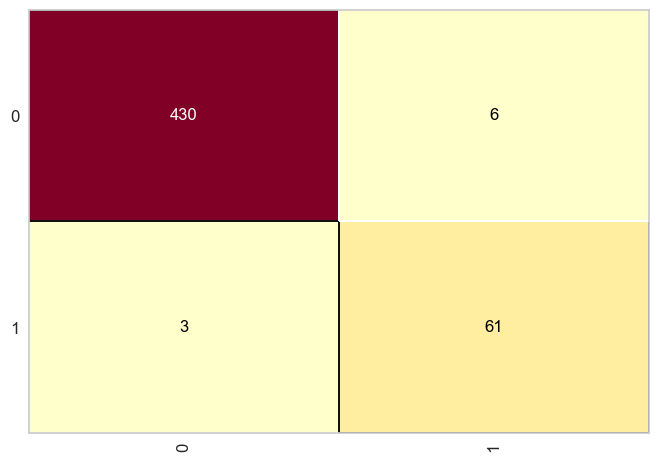

In [31]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

f) Faça um print do parâmetro classification_report entre os dados de teste e as previsões. Explique qual é a relação entre precision e recall nos dados. Como você interpreta esses dados?

In [35]:
print(classification_report(y_credit_teste, previsao))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



g) Gere uma visualização da sua árvore de decisão utilizando o pacote tree da biblioteca do sklearn.

OBS 1: Os atributos previsores são = ['income', 'age', 'loan']

OBS 2: Adicione cores, nomes para os atributos e para as classes. Você pode utilizar a função fig.savefig para salvar a árvore em uma imagem .png

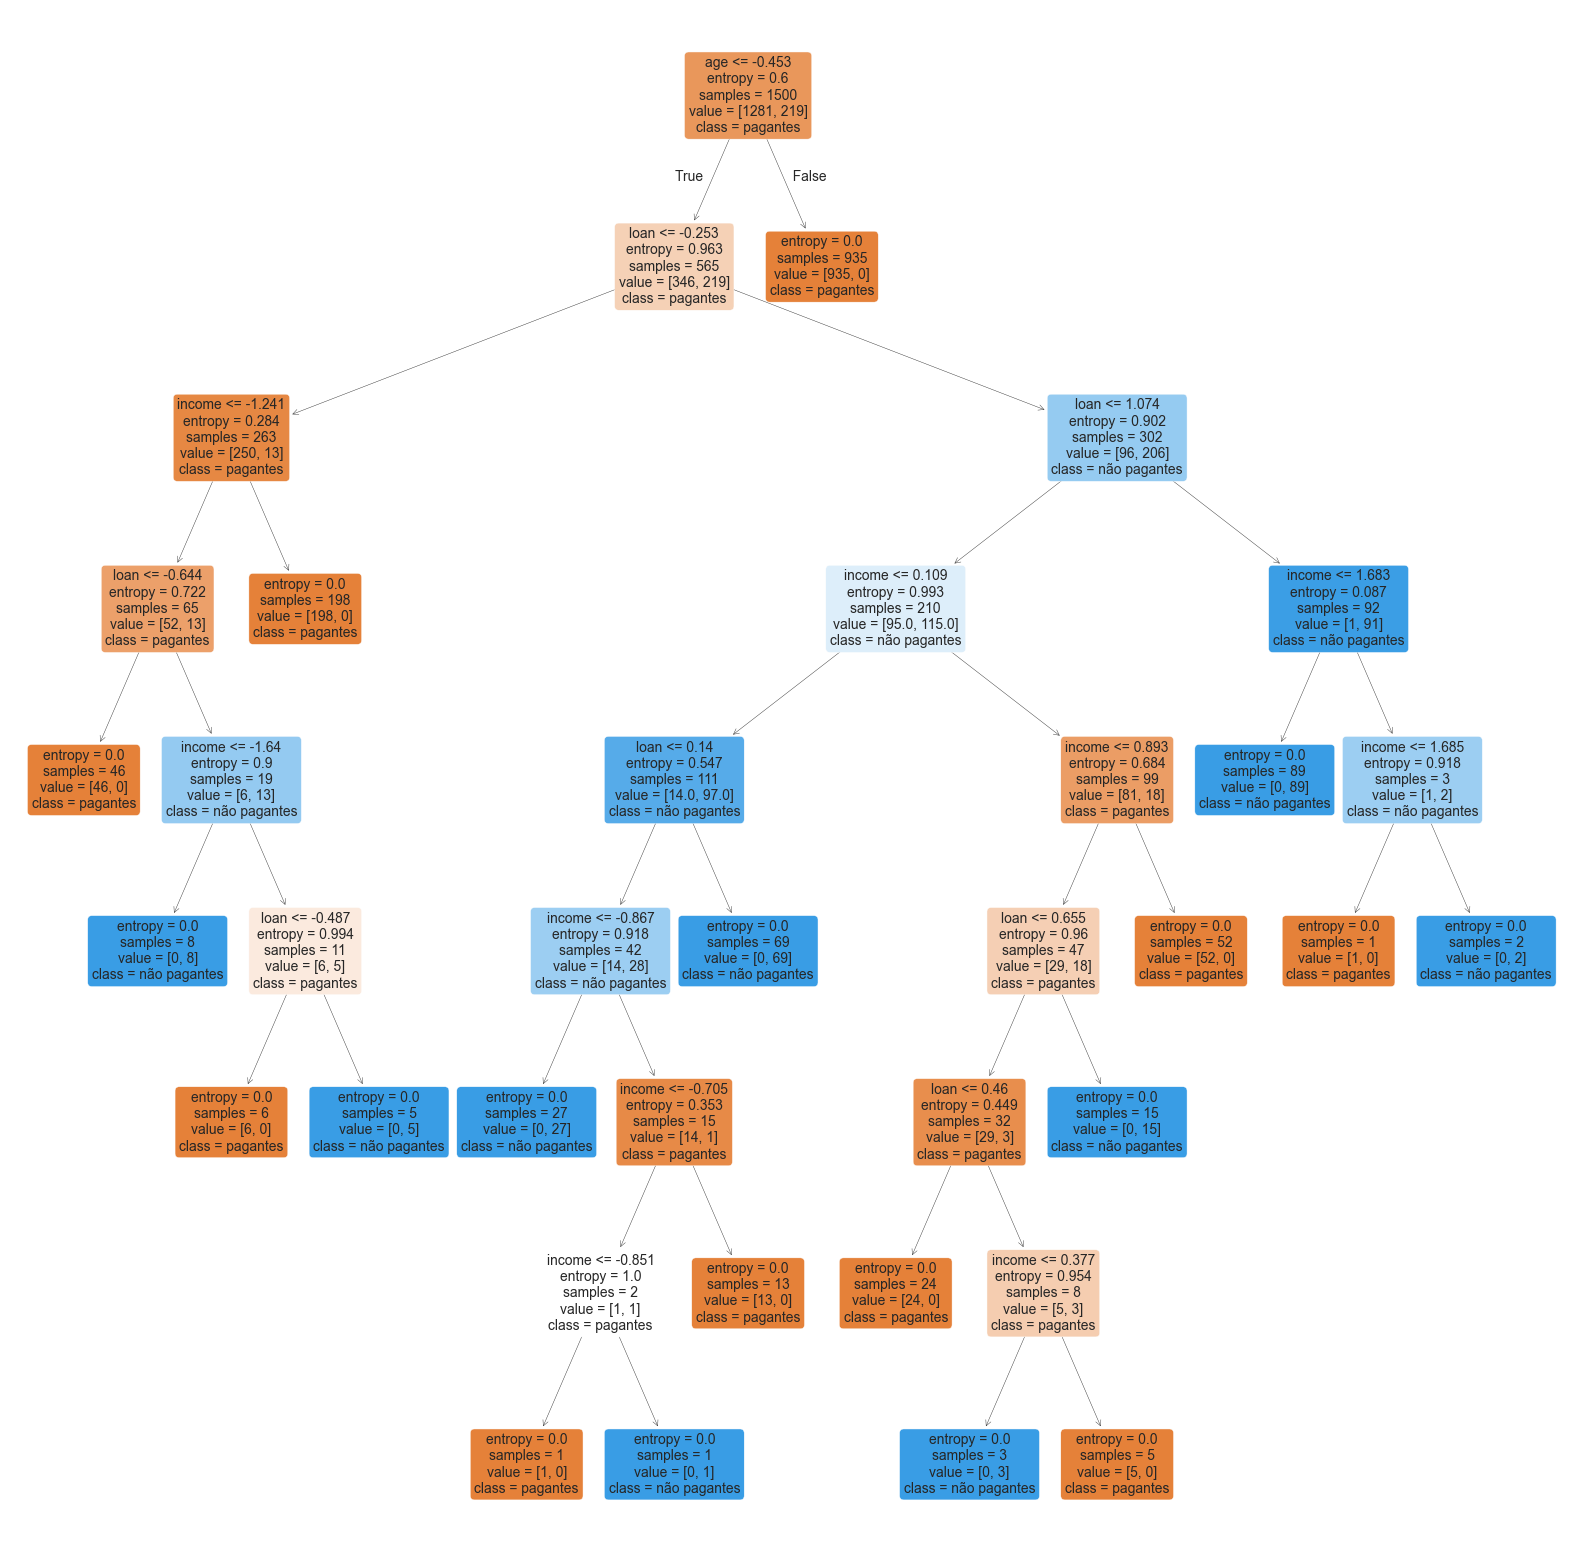

In [44]:
atributes = ['income', 'age', 'loan']
classes = ['pagantes', 'não pagantes']

plt.figure(figsize=(20, 20))
tree.plot_tree(
    arvore_credit,
    feature_names=atributes,
    class_names=classes,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

# Algoritmo Random Forest

Nesta seção iremos utilizar o algoritmo Random Forest para a mesma base de crédito (**Credit Risk Dataset**) - arquivo *credit.pkl*.

a) Importe o pacote RandomForestClassifier do sklearn para treinar o seu algoritmo de floresta randomica.

In [45]:
from sklearn.ensemble import RandomForestClassifier

b) Para gerar a classificação você deve adicionar alguns parâmetros:
*   n_estimators=10  --> número de árvores que você irá criar
*   criterion='entropy'
*   random_state = 0

In [46]:
random_forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


c) Faça a previsão com os dados de teste. Visualize os dados e verifique se as previsões estão de acordo com os dados de teste (respostas reais).

In [48]:
random_forest.fit(X_credit_treinamento, y_credit_treinamento)
previsao = random_forest.predict(X_credit_teste)

print(previsao)
print(y_credit_teste)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 

d) Agora faça o cálculo da acurácia para calcular a taxa de acerto entre os valores reais (y teste) e as previsões. O resultado foi melhor do que a árvore de decisão simples?

In [49]:
accuracy_score(y_credit_teste, previsao)

0.968

e) Se o resultado foi inferior, como você poderia resolver isso? Quais foram os resultados obtidos?

Aumentando a quantidade de árvores para 39, chega-se a acurácia de 0.984.

In [73]:
random_forest = RandomForestClassifier(n_estimators=39, criterion='entropy', random_state=0)
random_forest.fit(X_credit_treinamento, y_credit_treinamento)
previsao = random_forest.predict(X_credit_teste)

accuracy_score(y_credit_teste, previsao)

0.984

f) Faça a análise da Matriz de Confusão.

0.984

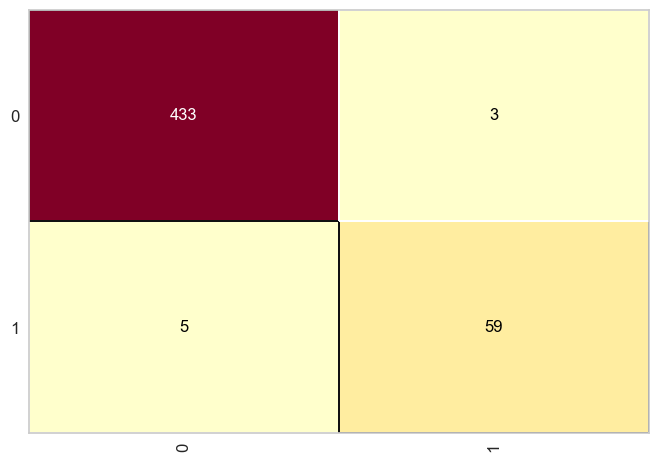

In [76]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

g) Faça um print do parâmetro classification_report entre os dados de teste e as previsões. Explique qual é a relação entre precision e recall nos dados. Como você interpreta esses dados?

A precisão é mais alta do que o recall, a alta precisão indica poucos falsos positivos. Já um alto recall indica poucos falsos negativos. Nesse cenário a árvore é superior lidando com a precision, ou seja, boa parte das previsões positivas estão corretas.

In [78]:
print(classification_report(y_credit_teste, previsao))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500

